<a href="https://colab.research.google.com/github/JustinhSE/Decision-Modeling-IBM/blob/main/presentations/notebook/Mini_Sprint_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/f1MS'

Mounted at /content/drive
/content/drive/My Drive/f1MS


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('lap_times.csv')

print(f"EDA for Lap Times\n")
df

EDA for Lap Times



,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


In [ ]:
X = df['position'].values.reshape(-1, 1)
y = df['milliseconds'].values

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")




Mean Squared Error: 6402581253.92


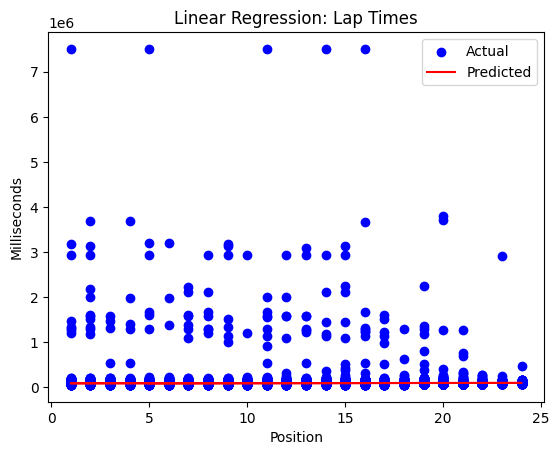

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Position')
plt.ylabel('Milliseconds')
plt.title('Linear Regression: Lap Times')
plt.legend()
plt.show()


in seek of a better model so flipped x and y axis and now i am doing

In [ ]:
X_flipped = df['milliseconds'].values.reshape(-1, 1)
y_flipped = df['lap'].values


In [ ]:
model_flipped = LinearRegression()


In [ ]:
X_train_flipped, X_test_flipped, y_train_flipped, y_test_flipped = train_test_split(X_flipped, y_flipped, test_size=0.2, random_state=42)


Mean Squared Error (Flipped): 336.85


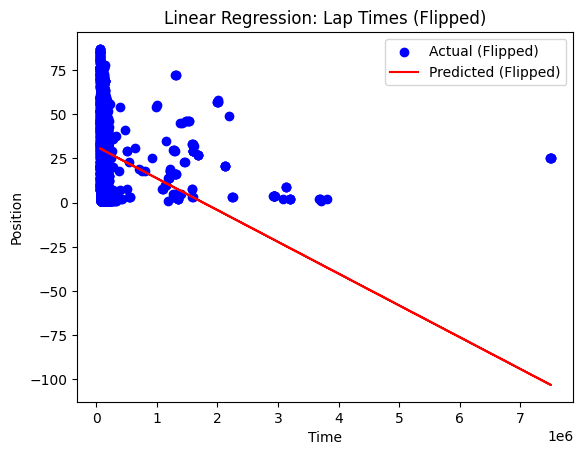

In [ ]:
model_flipped.fit(X_train_flipped, y_train_flipped)
y_pred_flipped = model_flipped.predict(X_test_flipped)
mse_flipped = mean_squared_error(y_test_flipped, y_pred_flipped)
print(f"Mean Squared Error (Flipped): {mse_flipped:.2f}")

plt.scatter(X_test_flipped, y_test_flipped, color='blue', label='Actual (Flipped)')
plt.plot(X_test_flipped, y_pred_flipped, color='red', label='Predicted (Flipped)')
plt.xlabel('Time')
plt.ylabel('Lap')
plt.title('Linear Regression: Lap Times')
plt.legend()
plt.show()


In [ ]:
df

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115




---



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/f1MS'


Mounted at /content/drive
/content/drive/My Drive/f1MS


In [ ]:

# Read the CSV files
df1 = pd.read_csv('driver_standings.csv')
df2 = pd.read_csv('lap_times.csv')

# Merge the dataframes based on common columns
merged_df = pd.merge(df1[['raceId', 'driverId', 'wins']],
                     df2[['raceId', 'driverId', 'lap', 'milliseconds']],
                     on=['raceId', 'driverId'],
                     how='inner')

# Display the merged dataframe
# print(merged_df)

merged_df

merged_df.to_csv('merged_df.csv', index=False) #exported file


---

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('merged_df.csv')


In [ ]:
df = df[df['wins'] != 0]

In [ ]:
df['seconds'] = df['milliseconds'] / 1000


In [ ]:
from scipy import stats

z_scores = stats.zscore(df['seconds'])
threshold = 3  # Adjust the threshold as needed
df = df[(z_scores < threshold)]


In [ ]:
X = df['seconds'].values.reshape(-1, 1)
y = df['wins']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)


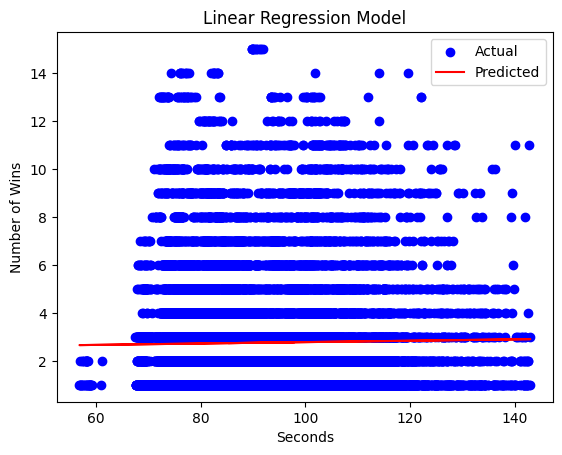

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Seconds')
plt.ylabel('Number of Wins')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


Trying a neural network

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('merged_df.csv')

# Split features and target
X = df[['raceId', 'driverId', 'wins', 'lap']]
y = df['milliseconds']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
10917/10917 [==============================] - 26s 2ms/step - loss: 6765747712.0000 - val_loss: 5147359232.0000
Epoch 2/10
10917/10917 [==============================] - 23s 2ms/step - loss: 6000512512.0000 - val_loss: 4341983232.0000
Epoch 3/10
10917/10917 [==============================] - 21s 2ms/step - loss: 5684923392.0000 - val_loss: 4329802752.0000
Epoch 4/10
10917/10917 [==============================] - 25s 2ms/step - loss: 5670522880.0000 - val_loss: 4307911680.0000
Epoch 5/10
10917/10917 [==============================] - 23s 2ms/step - loss: 5666345472.0000 - val_loss: 4295811584.0000
Epoch 6/10
10917/10917 [==============================] - 24s 2ms/step - loss: 5662651904.0000 - val_loss: 4293167104.0000
Epoch 7/10
10917/10917 [==============================] - 23s 2ms/step - loss: 5658803712.0000 - val_loss: 4470302720.0000
Epoch 8/10
10917/10917 [==============================] - 26s 2ms/step - loss: 5659462144.0000 - val_loss: 4289511936.0000
Epoch 9/10
10917

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error: {mae:.2f} milliseconds")
print(f"Root Mean Squared Error: {rmse:.2f} milliseconds")


3412/3412 [==============================] - 4s 1ms/step
Mean Absolute Error: 14076.75 milliseconds
Root Mean Squared Error: 80877.28 milliseconds


In [ ]:
new_data = pd.DataFrame({'raceId': [100], 'driverId': [10], 'wins': [5], 'lap': [50]})
predicted_time = model.predict(new_data)
print(f"Predicted time: {predicted_time[0][0]:.2f} milliseconds")


1/1 [==============================] - 0s 19ms/step
Predicted time: 83503.96 milliseconds


just sorting data and reevaluating as a neural network did not work as the loss was too much

In [ ]:


# Sort by a specific column (e.g., 'column_name')
sorted_df = df.sort_values(by='wins')

sorted_df


,raceId,driverId,wins,lap,milliseconds
272903,849,17,0,17,102376
348253,912,826,0,7,90760
348252,912,826,0,6,91246
348251,912,826,0,5,91254
348250,912,826,0,4,92325
...,...,...,...,...,...
532034,1096,830,15,21,111197
532035,1096,830,15,22,90660
532036,1096,830,15,23,90671
532028,1096,830,15,15,91023


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from 'merged_df.csv'
df = pd.read_csv('merged_df.csv')

# 1. Average Lap Time by RaceId and Lap Number
avg_lap_time = df.groupby(['raceId', 'lap'])['milliseconds'].mean()

# 2. Fastest Lap Time by RaceId and DriverId
fastest_lap = df.groupby(['raceId', 'driverId'])['milliseconds'].min()

# 3. DriverId with Least Milliseconds for Each Wins Value
least_milliseconds_by_wins = df.groupby('wins').apply(lambda x: x.loc[x['milliseconds'].idxmin()])

# Display the results
print("Average Lap Time by RaceId and Lap Number:")
print(avg_lap_time)

print("\nFastest Lap Time by RaceId and DriverId:")
print(fastest_lap)

print("\nDriverId with Least Milliseconds for Each Wins Value:")
print(least_milliseconds_by_wins[['driverId', 'wins', 'milliseconds']])



Average Lap Time by RaceId and Lap Number:
raceId  lap
1       1      117216.733333
        2       94666.400000
        3       92269.000000
        4       91517.800000
        5       90930.866667
                   ...      
1110    40     112354.722222
        41     112166.888889
        42     112715.777778
        43     113142.722222
        44     112122.000000
Name: milliseconds, Length: 31151, dtype: float64

Fastest Lap Time by RaceId and DriverId:
raceId  driverId
1       2            88283
        3            87706
        4            88712
        7            89823
        8            88488
                     ...  
1110    847         110603
        848         109841
        852         111394
        855         110188
        858         110236
Name: milliseconds, Length: 10167, dtype: int64

DriverId with Least Milliseconds for Each Wins Value:
      driverId  wins  milliseconds
wins                              
0          847     0         55404
1          8

Mean Squared Error (MSE): 12055503.99
R-squared (R2): 0.79


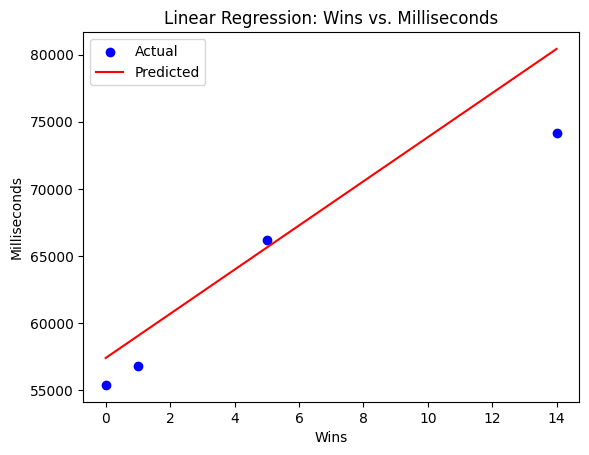

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have the 'least_milliseconds_by_wins' DataFrame
# If not, load it from your data source

# Prepare the data
X = least_milliseconds_by_wins['wins'].values.reshape(-1, 1)
y = least_milliseconds_by_wins['milliseconds']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Wins')
plt.ylabel('Milliseconds')
plt.title('Linear Regression: Wins vs. Milliseconds')
plt.legend()
plt.show()


Mean Squared Error: 28672814.30


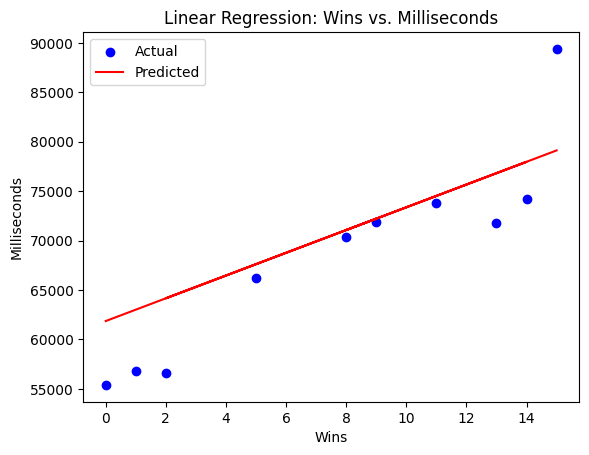

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a DataFrame from your data
data = {
    'wins': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'milliseconds': [55404, 56789, 56563, 67058, 68017, 66200, 67275, 67012, 70412, 71845, 71082, 73783, 79071, 71763, 74195, 89392]
}
df = pd.DataFrame(data)

# Split the data into training and testing sets
X = df[['wins']]
y = df['milliseconds']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the data and regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Wins')
plt.ylabel('Milliseconds')
plt.title('Linear Regression: Wins vs. Milliseconds')
plt.legend()
plt.show()


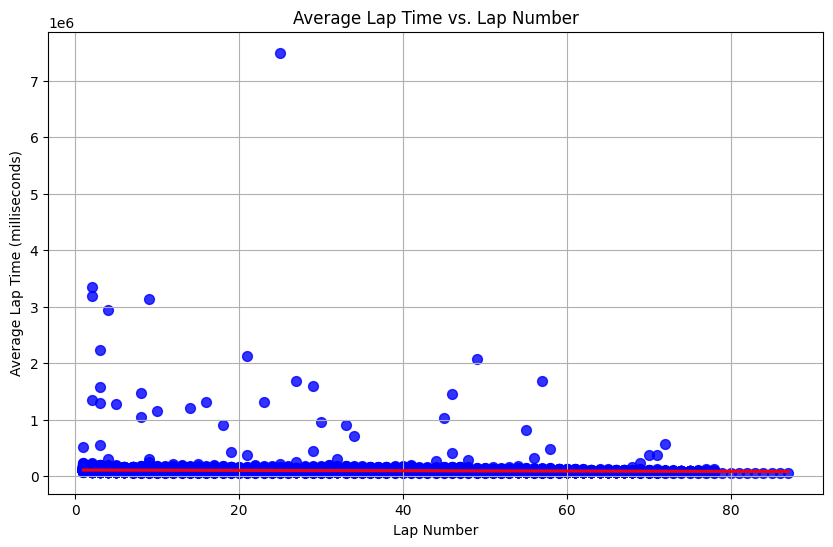

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the 'avg_lap_time' DataFrame
# If not, load it from your data source

# Reset the index for easier plotting
avg_lap_time_reset = avg_lap_time.reset_index()

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='lap', y='milliseconds', data=avg_lap_time_reset, scatter_kws={'s': 50}, color='b', line_kws={'color': 'r'})
plt.title('Average Lap Time vs. Lap Number')
plt.xlabel('Lap Number')
plt.ylabel('Average Lap Time (milliseconds)')
plt.grid(True)
plt.show()


FILTERING

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the 'avg_lap_time' DataFrame
# If not, load it from your data source

# Reset the index for easier plotting
avg_lap_time_reset = avg_lap_time.reset_index()

# Filter out lap times below 2 million milliseconds
filtered_avg_lap_time = avg_lap_time_reset[avg_lap_time_reset['milliseconds'] <= 1e5]

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='lap', y='milliseconds', data=filtered_avg_lap_time, scatter_kws={'s': 50}, color='b', line_kws={'color': 'r'})
plt.title('Average Lap Time vs. Lap Number')
plt.xlabel('Lap Number')
plt.ylabel('Average Lap Time (milliseconds)')
plt.grid(True)
plt.show()


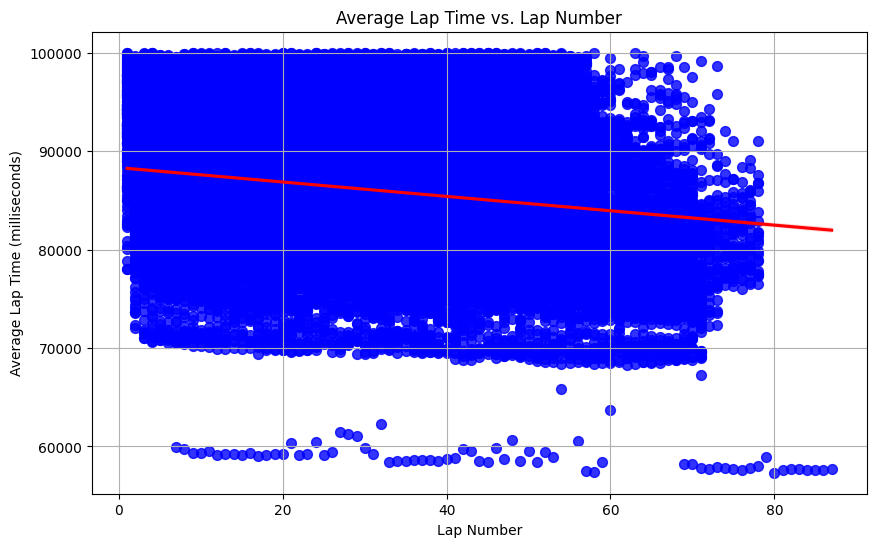